## Creamos un dataframe con los resultados

In [7]:
import pandas as pd

data = {
    'Prophet sin Regresores': [196.10, 212.54, 79.51],
    'Prophet con Regresores': [102.50, 109.76, 52.30],
    'NeuralProphet': [169.50, None, None],
    'XGBoost': [151.91, 152.29, 73.20],
    'TimeGPT (sin ajustes)': [61.78, 83.16, 45.92],
    'TimeGPT (con ajustes)': [70.47, 94.00, 55.42]
}

df_resultados = pd.DataFrame(data, index=['DispatchDate', 'ReceivedDate', 'ResultDate'])
print(df_resultados)

              Prophet sin Regresores  Prophet con Regresores  NeuralProphet  \
DispatchDate                  196.10                  102.50          169.5   
ReceivedDate                  212.54                  109.76            NaN   
ResultDate                     79.51                   52.30            NaN   

              XGBoost  TimeGPT (sin ajustes)  TimeGPT (con ajustes)  
DispatchDate   151.91                  61.78                  70.47  
ReceivedDate   152.29                  83.16                  94.00  
ResultDate      73.20                  45.92                  55.42  


## Graficamos los resultados 

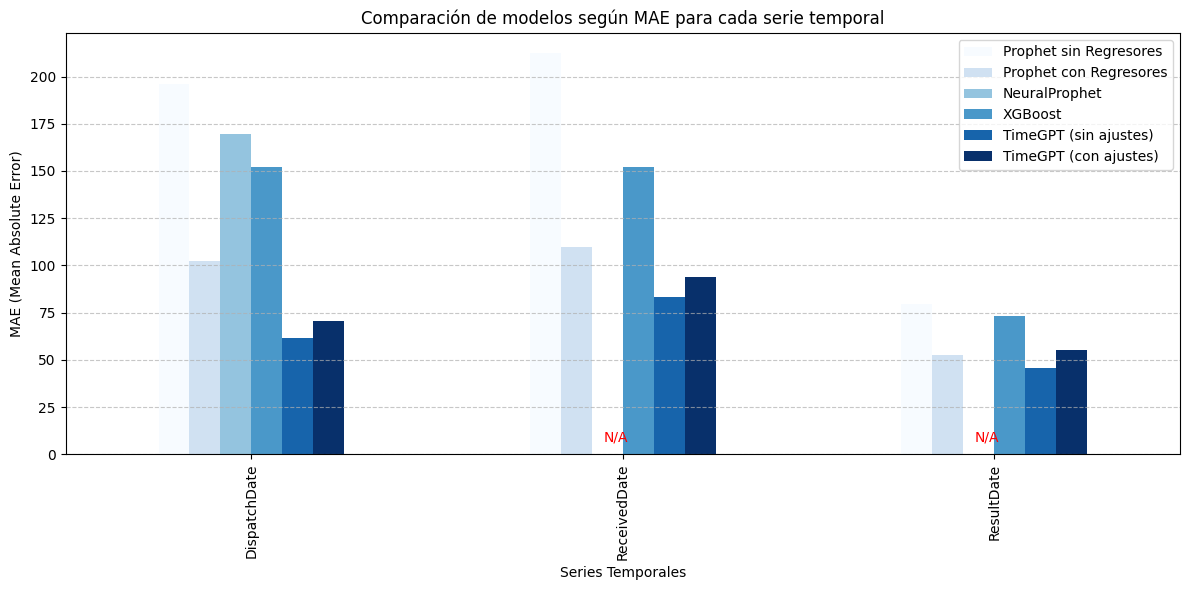

In [8]:
# Gráfico desde el DataFrame
ax = df_resultados.plot.bar(figsize=(12, 6), colormap='Blues')

# Configuraciones adicionales
ax.set_xlabel('Series Temporales')
ax.set_ylabel('MAE (Mean Absolute Error)')
ax.set_title('Comparación de modelos según MAE para cada serie temporal')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores faltantes
for i, col in enumerate(df_resultados.columns):
    for j, val in enumerate(df_resultados[col]):
        if pd.isna(val):
            ax.text(j - 0.3 + i*(0.14), 5, 'N/A', ha='center', va='bottom', fontsize=10, color='red')

plt.tight_layout()
plt.show()

## Presentar una tabla con el comparativo de valores 

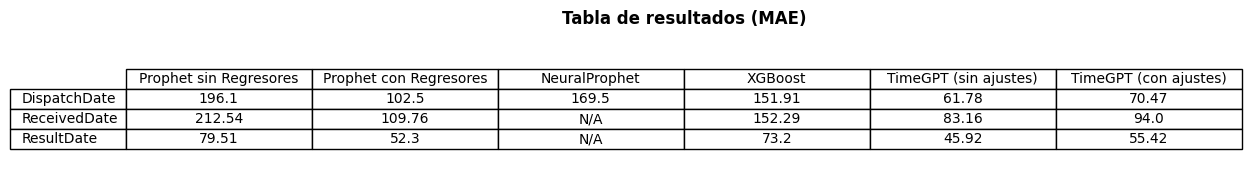

In [9]:
# Prestamos una tabla con los resultados 
import matplotlib.table as tbl

fig, ax = plt.subplots(figsize=(12, 2))
ax.axis('off')  # Ocultar ejes para mostrar solo la tabla

# Crear tabla
table = tbl.table(ax, 
                  cellText=df_resultados.fillna('N/A').values, 
                  rowLabels=df_resultados.index, 
                  colLabels=df_resultados.columns, 
                  loc='center', 
                  cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title("Tabla de resultados (MAE)", fontsize=12, fontweight='bold')
plt.show()